In [1]:
import xarray as xr

In [16]:
ds = xr.open_dataset('/Projects/CEFI/private/scratch/chsu/NWA_reforecast_decadal_r20250502/concat/tos.decadal.ocean_month.i196501.nc')
ds_static = xr.open_dataset('/Projects/CEFI/private/scratch/chsu/NWA_reforecast_decadal_r20250502/concat/ocean_static.nc')
ds_static['geolon'] = ds_static['geolon'].where(~ds_static['geolon'].isnull(), other=0)
ds_static['geolat'] = ds_static['geolat'].where(~ds_static['geolat'].isnull(), other=0)

In [17]:
ds = xr.merge([ds, ds_static])

In [18]:
ds = ds.set_coords(['geolon','geolat'])

In [19]:
ds

<xarray.Dataset> Size: 3GB
Dimensions:       (lead: 120, member: 10, yh: 845, xh: 775, time: 1, xq: 776,
                   yq: 846)
Coordinates:
  * lead          (lead) datetime64[ns] 960B 1965-01-16T12:00:00 ... 1974-12-...
  * xh            (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
  * yh            (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.9 51.91 51.93
  * member        (member) int64 80B 1 2 3 4 5 6 7 8 9 10
  * time          (time) datetime64[ns] 8B 2022-01-01
  * xq            (xq) float64 6kB -98.04 -97.96 -97.88 ... -36.2 -36.12 -36.04
  * yq            (yq) float64 7kB 5.233 5.312 5.392 5.472 ... 51.9 51.92 51.94
    geolon        (yh, xh) float32 3MB 0.0 0.0 0.0 0.0 ... -37.36 -37.27 -37.19
    geolat        (yh, xh) float32 3MB 0.0 0.0 0.0 0.0 ... 58.15 58.16 58.16
Data variables: (12/25)
    tos           (lead, member, yh, xh) float32 3GB ...
    init          datetime64[ns] 8B ...
    areacello     (yh, xh) float32 3MB ...
    deptho        (yh, xh) float32 3MB ...
    sftof         (yh, xh) float32 3MB ...
    Coriolis      (yq, xq) float32 3MB ...
    ...            ...
    dyCu          (yh, xq) float32 3MB ...
    dxCv          (yq, xh) float32 3MB ...
    dyCv          (yq, xh) float32 3MB ...
    areacello_cu  (yh, xq) float32 3MB ...
    areacello_cv  (yq, xh) float32 3MB ...
    areacello_bu  (yq, xq) float32 3MB ...
Attributes:
    NumFilesInSet:     1
    title:             NWA12_physics_2023_prod_SPEAR_h14_1965_e7
    associated_files:  areacello: 19650101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A

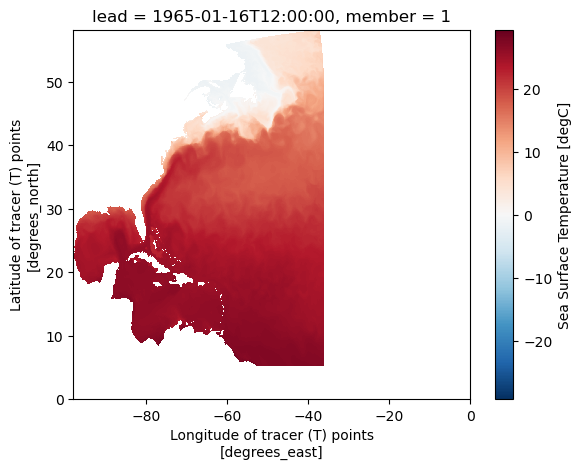

In [20]:
ds.tos.isel(lead=0,member=0).plot(x='geolon',y='geolat')